In [1]:
import findspark
findspark.init('/home/sdmohant/spark-3.0.0-bin-hadoop2.7')

import pyspark
import random

In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.appName("Basics").config('spark.sql.shuffle.partitions',300).getOrCreate() # Increasing SQL shuffle partitions

/home/sdmohant/spark-3.0.0-bin-hadoop2.7/python/pyspark/context.py:220: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


In [4]:
sc = spark.sparkContext

In [5]:
from pyspark.sql.functions import isnan, when, count, col

In [6]:
#Reading Paper Data
paper_df = spark.read.options(header = True,delimiter=',', inferSchema= True).csv("Paper.csv")

In [7]:
paper_df.printSchema()

root
 |-- PaperID: long (nullable = true)
 |-- Rank: integer (nullable = true)
 |-- DOI: string (nullable = true)
 |-- DocType: string (nullable = true)
 |-- PaperTitle: string (nullable = true)
 |-- OriginalTitle: string (nullable = true)
 |-- PaperYear: integer (nullable = true)
 |-- PaperDate: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- JournalID: long (nullable = true)
 |-- ConfSeriesID: long (nullable = true)
 |-- ConfInstanceID: long (nullable = true)
 |-- ReferenceCount: integer (nullable = true)
 |-- CitationCount: integer (nullable = true)
 |-- EstimatedCount: integer (nullable = true)



In [8]:
paper_df.show(2)

+----------+-----+--------------------+----------+--------------------+--------------------+---------+----------+---------+---------+------------+--------------+--------------+-------------+--------------+
|   PaperID| Rank|                 DOI|   DocType|          PaperTitle|       OriginalTitle|PaperYear| PaperDate|Publisher|JournalID|ConfSeriesID|ConfInstanceID|ReferenceCount|CitationCount|EstimatedCount|
+----------+-----+--------------------+----------+--------------------+--------------------+---------+----------+---------+---------+------------+--------------+--------------+-------------+--------------+
|1819143627|24199|10.1109/PICMET.20...|Conference|technological inn...|Technological inn...|     2001|2001-01-01|     IEEE| 23074404|  2734834919|    2735348883|             0|            0|             0|
|1963578506|22929|10.1109/ICIEEM.20...|Conference|a hybrid due date...|A hybrid due-date...|     2010|2010-10-01|     IEEE|137519996|  1141689323|     180417304|            16|

In [9]:
paper_df=paper_df.withColumnRenamed("Rank","Paper_Rank")
paper_df=paper_df.withColumnRenamed("ReferenceCount","Paper_RefCnt")

In [10]:
paper_df.head(1)

[Row(PaperID=1819143627, Paper_Rank=24199, DOI=u'10.1109/PICMET.2001.951754', DocType=u'Conference', PaperTitle=u'technological innovation system and strategy in china s western regions', OriginalTitle=u"Technological innovation system and strategy in China's Western Regions", PaperYear=2001, PaperDate=u'2001-01-01', Publisher=u'IEEE', JournalID=23074404, ConfSeriesID=2734834919, ConfInstanceID=2735348883, Paper_RefCnt=0, CitationCount=0, EstimatedCount=0)]

In [11]:
#Read Journal Data
journal_df = spark.read.options(header = 'True',delimiter=',', inferSchema = True).csv("Journal.csv")

In [12]:
journal_df.show(2)

+---------+-----+--------------------+--------------------+-----------+--------------+
|JournalID| Rank|     Normalized_Name|        Display_Name|Paper_count|Citation_Count|
+---------+-----+--------------------+--------------------+-----------+--------------+
| 98941412|12196|handbooks of mana...|Handbooks of Mana...|         97|          1955|
|108758393| 9716|progress in lipid...|Progress in Lipid...|       1048|         77361|
+---------+-----+--------------------+--------------------+-----------+--------------+
only showing top 2 rows



In [13]:
journal_df=journal_df.withColumnRenamed("Rank","Journal_Rank")
journal_df=journal_df.withColumnRenamed("Paper_count","Journal_Pap_Cnt")
journal_df=journal_df.withColumnRenamed("Citation_Count","Journal_Cit_Cnt")

In [14]:
journal_df.count()

47919

In [15]:
#Joining Paper and Journal Data
df = paper_df.join(journal_df, on=['JournalID'], how='inner')

In [16]:
df.show(2)

+---------+----------+----------+--------------------+----------+--------------------+--------------------+---------+----------+---------+------------+--------------+------------+-------------+--------------+------------+--------------------+--------------------+---------------+---------------+
|JournalID|   PaperID|Paper_Rank|                 DOI|   DocType|          PaperTitle|       OriginalTitle|PaperYear| PaperDate|Publisher|ConfSeriesID|ConfInstanceID|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|     Normalized_Name|        Display_Name|Journal_Pap_Cnt|Journal_Cit_Cnt|
+---------+----------+----------+--------------------+----------+--------------------+--------------------+---------+----------+---------+------------+--------------+------------+-------------+--------------+------------+--------------------+--------------------+---------------+---------------+
| 23074404|1819143627|     24199|10.1109/PICMET.20...|Conference|technological inn...|Technological inn...|     

In [17]:
df.count()

120861

In [18]:
#df.describe().show()

In [19]:
#Read Conference Series Data
confSeries_df = spark.read.options(header = 'True',delimiter=',', inferSchema = True).csv("ConferenceSeries.csv")

In [20]:
confSeries_df.show(2)

+------------+------+----------------+--------------------+------------+----------+
|ConfSeriesID|CSRank|CSNormalizedName|       CSDisplayName|CSPaperCount|CSCitation|
+------------+------+----------------+--------------------+------------+----------+
|  1141689323| 11674|            IEEM|Industrial Engine...|        7218|      7851|
|  2727030889| 13563| BigDataSecurity|International Con...|         120|       122|
+------------+------+----------------+--------------------+------------+----------+
only showing top 2 rows



In [21]:
#Joining Paper, Journal with ConferenceSeries
df1 = df.join(confSeries_df, on=['ConfSeriesID'], how='inner')

In [22]:
df1.count()

120861

In [23]:
df1.show(2)

+------------+---------+----------+----------+--------------------+----------+--------------------+--------------------+---------+----------+---------+--------------+------------+-------------+--------------+------------+--------------------+--------------------+---------------+---------------+------+----------------+--------------------+------------+----------+
|ConfSeriesID|JournalID|   PaperID|Paper_Rank|                 DOI|   DocType|          PaperTitle|       OriginalTitle|PaperYear| PaperDate|Publisher|ConfInstanceID|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|     Normalized_Name|        Display_Name|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSNormalizedName|       CSDisplayName|CSPaperCount|CSCitation|
+------------+---------+----------+----------+--------------------+----------+--------------------+--------------------+---------+----------+---------+--------------+------------+-------------+--------------+------------+--------------------+--------------------+-------

In [24]:
df1.columns

['ConfSeriesID',
 'JournalID',
 'PaperID',
 'Paper_Rank',
 'DOI',
 'DocType',
 'PaperTitle',
 'OriginalTitle',
 'PaperYear',
 'PaperDate',
 'Publisher',
 'ConfInstanceID',
 'Paper_RefCnt',
 'CitationCount',
 'EstimatedCount',
 'Journal_Rank',
 'Normalized_Name',
 'Display_Name',
 'Journal_Pap_Cnt',
 'Journal_Cit_Cnt',
 'CSRank',
 'CSNormalizedName',
 'CSDisplayName',
 'CSPaperCount',
 'CSCitation']

In [25]:
#Read ConferenceInstance Data
confInstances_df = spark.read.options(header = 'True',delimiter=',', inferSchema = True).csv("ConferenceInstances.csv")

In [28]:
#Join Paper, Journal, ConferenceSeries with ConferenceInstance
df2 = df1.join(confInstances_df, on=['ConfInstanceID'], how='inner')

In [29]:
df2.show()

+--------------+------------+----------+----------+----------+--------------------+----------+--------------------+--------------------+---------+----------+--------------------+------------+-------------+--------------+------------+--------------------+--------------------+---------------+---------------+------+----------------+--------------------+------------+----------+------+--------------+-------------+----------+--------------------+--------------------+----------+----------+---------------+---------------+-------------------+-------------------+------------+------------------+
|ConfInstanceID|ConfSeriesID| JournalID|   PaperID|Paper_Rank|                 DOI|   DocType|          PaperTitle|       OriginalTitle|PaperYear| PaperDate|           Publisher|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|     Normalized_Name|        Display_Name|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSNormalizedName|       CSDisplayName|CSPaperCount|CSCitation|CIRank|CINormalizedNm|  CIDispla

In [30]:
df2.columns

['ConfInstanceID',
 'ConfSeriesID',
 'JournalID',
 'PaperID',
 'Paper_Rank',
 'DOI',
 'DocType',
 'PaperTitle',
 'OriginalTitle',
 'PaperYear',
 'PaperDate',
 'Publisher',
 'Paper_RefCnt',
 'CitationCount',
 'EstimatedCount',
 'Journal_Rank',
 'Normalized_Name',
 'Display_Name',
 'Journal_Pap_Cnt',
 'Journal_Cit_Cnt',
 'CSRank',
 'CSNormalizedName',
 'CSDisplayName',
 'CSPaperCount',
 'CSCitation',
 'CIRank',
 'CINormalizedNm',
 'CIDisplayNm',
 'CICSID',
 'Location',
 'CIOfficialURL',
 'StartDate',
 'EndDate',
 'AbstractRegDate',
 'SubDeadlineDate',
 'NotificationDueDate',
 'FinalVersionDueDate',
 'CIPaperCount',
 'CIPaperCitationCnt']

In [31]:
len(df2.columns)

39

In [32]:
drop_cols = [ 'PaperTitle',
 'OriginalTitle',
'PaperYear',
 'PaperDate',
 'Normalized_Name',
 'Display_Name',
 'CSNormalizedName',
 'CSDisplayName',
 'CINormalizedNm',
 'CIDisplayNm',
'CIOfficialURL',
 'StartDate',
 'EndDate',
 'AbstractRegDate',
 'SubDeadlineDate',
 'NotificationDueDate',
 'FinalVersionDueDate']

In [33]:
#Drop non-numeric columns
df3 = df2.drop(*drop_cols)

In [34]:
len(df2.columns)

39

In [35]:
len(df3.columns)

22

In [36]:
df3.show(2)

+--------------+------------+---------+----------+----------+--------------------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+----------+-----------------+------------+------------------+
|ConfInstanceID|ConfSeriesID|JournalID|   PaperID|Paper_Rank|                 DOI|   DocType|Publisher|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSPaperCount|CSCitation|CIRank|    CICSID|         Location|CIPaperCount|CIPaperCitationCnt|
+--------------+------------+---------+----------+----------+--------------------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+----------+-----------------+------------+------------------+
|    2735348883|  2734834919| 23074404|1819143627|     24199|10.1109/PICMET.20...|Conference|     IEEE|           0|            0|

In [37]:
drop_cols = ['DOI','Location','CICSID']
df3 = df3.drop(*drop_cols)

In [38]:
result = df3.describe()

In [39]:
df3.printSchema()

root
 |-- ConfInstanceID: long (nullable = true)
 |-- ConfSeriesID: long (nullable = true)
 |-- JournalID: long (nullable = true)
 |-- PaperID: long (nullable = true)
 |-- Paper_Rank: integer (nullable = true)
 |-- DocType: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Paper_RefCnt: integer (nullable = true)
 |-- CitationCount: integer (nullable = true)
 |-- EstimatedCount: integer (nullable = true)
 |-- Journal_Rank: integer (nullable = true)
 |-- Journal_Pap_Cnt: integer (nullable = true)
 |-- Journal_Cit_Cnt: integer (nullable = true)
 |-- CSRank: integer (nullable = true)
 |-- CSPaperCount: integer (nullable = true)
 |-- CSCitation: integer (nullable = true)
 |-- CIRank: integer (nullable = true)
 |-- CIPaperCount: integer (nullable = true)
 |-- CIPaperCitationCnt: integer (nullable = true)



In [40]:
result.select(['CitationCount']).show()

+------------------+
|     CitationCount|
+------------------+
|            120861|
|13.158777438545105|
| 60.97803587644721|
|                 0|
|              6770|
+------------------+



In [41]:
cit1 = df3.filter(df3.CitationCount < 200)
cit1.count()

120056

In [42]:
cit2 = df3.filter(df3.CitationCount < 500)
cit2.count()

120685

In [43]:
cit3 = df3.filter((df3.CitationCount >=500) & (df3.CitationCount <= 1000))
cit3.count()

122

In [44]:
cit4 = df3.filter((df3.CitationCount >=1000) & (df3.CitationCount <= 6000))
cit4.count()

53

In [45]:
cit5 = df3.filter(df3.CitationCount > 5000)
#len(cit5)
cit5.count()

2

## CitationsCount < 200

In [46]:
import matplotlib.pyplot as plt

bins, counts = cit1.select(cit1['CitationCount']).rdd.flatMap(lambda x: x).histogram(50)

 
plt.hist(bins[:-1], bins=bins, weights=counts)

(array([6.5410e+04, 1.8526e+04, 9.5090e+03, 5.9340e+03, 4.0120e+03,
        2.8360e+03, 2.1820e+03, 1.6960e+03, 1.3850e+03, 1.1240e+03,
        9.0000e+02, 7.6800e+02, 6.2800e+02, 5.6200e+02, 4.4700e+02,
        4.3000e+02, 3.6600e+02, 3.1600e+02, 2.5400e+02, 2.6200e+02,
        2.2500e+02, 2.0200e+02, 1.8500e+02, 1.4700e+02, 1.5500e+02,
        1.3800e+02, 1.1400e+02, 1.1700e+02, 1.0500e+02, 1.0400e+02,
        8.8000e+01, 8.2000e+01, 8.2000e+01, 6.9000e+01, 6.6000e+01,
        7.2000e+01, 6.8000e+01, 5.2000e+01, 4.8000e+01, 5.6000e+01,
        4.2000e+01, 4.9000e+01, 3.5000e+01, 3.8000e+01, 2.8000e+01,
        3.3000e+01, 3.1000e+01, 1.7000e+01, 3.1000e+01, 3.0000e+01]),
 array([  0.  ,   3.98,   7.96,  11.94,  15.92,  19.9 ,  23.88,  27.86,
         31.84,  35.82,  39.8 ,  43.78,  47.76,  51.74,  55.72,  59.7 ,
         63.68,  67.66,  71.64,  75.62,  79.6 ,  83.58,  87.56,  91.54,
         95.52,  99.5 , 103.48, 107.46, 111.44, 115.42, 119.4 , 123.38,
        127.36, 131.34, 135.32

In [47]:
cit = df3.filter(df3.CitationCount < 100)
#len(cit1)

## CitationsCount < 100

(array([3.2955e+04, 1.4400e+04, 1.0368e+04, 7.6870e+03, 6.0820e+03,
        4.9550e+03, 4.1420e+03, 3.3470e+03, 2.8710e+03, 2.5720e+03,
        2.1400e+03, 1.9260e+03, 1.7410e+03, 1.5630e+03, 1.3700e+03,
        1.2600e+03, 1.1620e+03, 1.0230e+03, 9.9300e+02, 8.3400e+02,
        7.8800e+02, 7.4900e+02, 6.3700e+02, 6.6200e+02, 5.8000e+02,
        5.8300e+02, 5.2200e+02, 4.9700e+02, 4.7200e+02, 4.3100e+02,
        4.0100e+02, 3.9200e+02, 3.8200e+02, 3.7200e+02, 3.1200e+02,
        3.1900e+02, 2.6300e+02, 2.9000e+02, 3.0500e+02, 2.6600e+02,
        2.3400e+02, 2.2600e+02, 2.3800e+02, 2.0200e+02, 2.1400e+02,
        1.8100e+02, 1.7600e+02, 1.9700e+02, 1.8100e+02, 1.5600e+02,
        1.4900e+02, 1.4200e+02, 1.4600e+02, 1.2800e+02, 1.4000e+02,
        1.4800e+02, 1.0600e+02, 1.4200e+02, 1.0800e+02, 9.1000e+01,
        9.9000e+01, 1.0200e+02, 1.1700e+02, 1.1200e+02, 1.0300e+02,
        9.3000e+01, 8.1000e+01, 8.9000e+01, 8.6000e+01, 7.9000e+01,
        6.8000e+01, 8.3000e+01, 7.4000e+01, 5.20

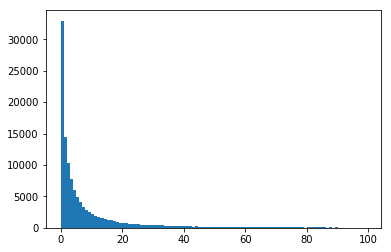

In [48]:
import matplotlib.pyplot as plt

bins, counts = cit.select(cit['CitationCount']).rdd.flatMap(lambda x: x).histogram(100)


plt.hist(bins[:-1], bins=bins, weights=counts)

## CitationsCount > 500 and < 1000

(array([7., 5., 6., 4., 2., 2., 9., 1., 4., 3., 6., 3., 3., 2., 3., 3., 3.,
        1., 0., 4., 3., 0., 1., 4., 3., 4., 1., 4., 1., 0., 0., 3., 2., 1.,
        0., 3., 2., 3., 2., 2., 3., 0., 0., 1., 0., 2., 2., 2., 0., 2.]),
 array([502.  , 511.86, 521.72, 531.58, 541.44, 551.3 , 561.16, 571.02,
        580.88, 590.74, 600.6 , 610.46, 620.32, 630.18, 640.04, 649.9 ,
        659.76, 669.62, 679.48, 689.34, 699.2 , 709.06, 718.92, 728.78,
        738.64, 748.5 , 758.36, 768.22, 778.08, 787.94, 797.8 , 807.66,
        817.52, 827.38, 837.24, 847.1 , 856.96, 866.82, 876.68, 886.54,
        896.4 , 906.26, 916.12, 925.98, 935.84, 945.7 , 955.56, 965.42,
        975.28, 985.14, 995.  ]),
 <a list of 50 Patch objects>)

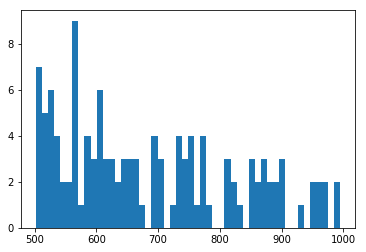

In [49]:
import matplotlib.pyplot as plt

bins, counts = cit3.select(cit3['CitationCount']).rdd.flatMap(lambda x: x).histogram(50)

plt.hist(bins[:-1], bins=bins, weights=counts)

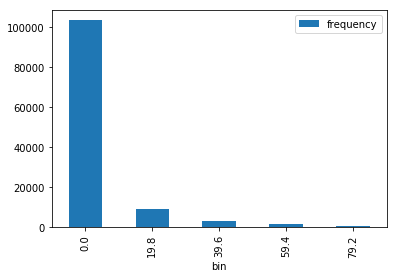

In [50]:
# Doing the heavy lifting in Spark. We could leverage the `histogram` function from the RDD api

import pandas as pd
gre_histogram = cit.select('CitationCount').rdd.flatMap(lambda x: x).histogram(5)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(list(zip(*gre_histogram)), columns=['bin','frequency']).set_index('bin').plot(kind='bar');

## Count of Citations = 0 

In [51]:
cit0 = df3.filter(df3.CitationCount == 0)

cit0.count()

32955

#### Convert Categorical variables Publisher and DocType to numerical

In [52]:
from pyspark.ml.feature import CountVectorizer

In [53]:
df3.show(2)

+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+
|ConfInstanceID|ConfSeriesID|JournalID|   PaperID|Paper_Rank|   DocType|Publisher|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSPaperCount|CSCitation|CIRank|CIPaperCount|CIPaperCitationCnt|
+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+
|    2735348883|  2734834919| 23074404|1819143627|     24199|Conference|     IEEE|           0|            0|             0|        9728|           9284|          64351| 11187|        4309|      6256| 25000|         405|               759|
|     180417304|  1141689323|137519996|1

In [54]:
df3.count()

120861

In [55]:
df3_fil = df3.filter(((df3["Publisher"] != "") | (df3["Publisher"].isNotNull())))

In [56]:
df3_fil = df3_fil.filter(((df3_fil["DocType"] != "") | (df3_fil["DocType"].isNotNull())))

In [57]:
df3_fil.count()

90728

In [58]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Publisher", outputCol="PublisherIndex")
indexed = indexer.fit(df3_fil).transform(df3_fil)
indexed.show(2)

+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+--------------+
|ConfInstanceID|ConfSeriesID|JournalID|   PaperID|Paper_Rank|   DocType|Publisher|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSPaperCount|CSCitation|CIRank|CIPaperCount|CIPaperCitationCnt|PublisherIndex|
+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+--------------+
|    2735348883|  2734834919| 23074404|1819143627|     24199|Conference|     IEEE|           0|            0|             0|        9728|           9284|          64351| 11187|        4309|      6256| 25000|         405|               

In [59]:
indexer = StringIndexer(inputCol="DocType", outputCol="DocTypeIndex")
indexed = indexer.fit(indexed).transform(indexed)
indexed.show(2)

+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+--------------+------------+
|ConfInstanceID|ConfSeriesID|JournalID|   PaperID|Paper_Rank|   DocType|Publisher|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSPaperCount|CSCitation|CIRank|CIPaperCount|CIPaperCitationCnt|PublisherIndex|DocTypeIndex|
+--------------+------------+---------+----------+----------+----------+---------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+--------------+------------+
|    2735348883|  2734834919| 23074404|1819143627|     24199|Conference|     IEEE|           0|            0|             0|        9728|           9284|          64351| 11187|        4309|      6

In [60]:
drop_cols = ["Publisher","DocType","PublisherIndex"]
final_df =indexed.drop(*drop_cols)

In [61]:
final_df.select("DocTypeIndex").distinct().show()

+------------+
|DocTypeIndex|
+------------+
|         1.0|
|         0.0|
|         2.0|
+------------+



In [62]:
#final_df.select("PublisherIndex").distinct().count()

In [63]:
final_df.show(1)

+--------------+------------+---------+----------+----------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+------------+
|ConfInstanceID|ConfSeriesID|JournalID|   PaperID|Paper_Rank|Paper_RefCnt|CitationCount|EstimatedCount|Journal_Rank|Journal_Pap_Cnt|Journal_Cit_Cnt|CSRank|CSPaperCount|CSCitation|CIRank|CIPaperCount|CIPaperCitationCnt|DocTypeIndex|
+--------------+------------+---------+----------+----------+------------+-------------+--------------+------------+---------------+---------------+------+------------+----------+------+------------+------------------+------------+
|    2735348883|  2734834919| 23074404|1819143627|     24199|           0|            0|             0|        9728|           9284|          64351| 11187|        4309|      6256| 25000|         405|               759|         0.0|
+--------------+------------+---------+----------+----------+-----------

In [64]:
# Split 70% for training and 30% for testing
train, test = final_df.randomSplit([0.7, 0.3])
print("We have %d training examples and %d test examples." % (train.count(), test.count()))

We have 63430 training examples and 27298 test examples.


In [65]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
featuresCols = final_df.columns
featuresCols.remove('CitationCount')
# Concatenates all feature columns into a single feature vector in a new column "rawFeatures"
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
# Identifies categorical features and indexes them
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

In [66]:
from pyspark.ml.regression import GBTRegressor
# Takes the "features" column and learns to predict "cnt"
gbt = GBTRegressor(labelCol="CitationCount")

In [67]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [68]:
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100])\
  .build()
evaluator = RegressionEvaluator(metricName="r2", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [69]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])

In [70]:
pipelineModel = pipeline.fit(train)

In [71]:
predictions = pipelineModel.transform(test)
display(predictions.select("CitationCount", "prediction", *featuresCols))

DataFrame[CitationCount: int, prediction: double, ConfInstanceID: bigint, ConfSeriesID: bigint, JournalID: bigint, PaperID: bigint, Paper_Rank: int, Paper_RefCnt: int, EstimatedCount: int, Journal_Rank: int, Journal_Pap_Cnt: int, Journal_Cit_Cnt: int, CSRank: int, CSPaperCount: int, CSCitation: int, CIRank: int, CIPaperCount: int, CIPaperCitationCnt: int, DocTypeIndex: double]

In [72]:
r2 = evaluator.evaluate(predictions)
print("R2 on our test set: %g" % r2)

R2 on our test set: 0.466581


In [73]:
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100])\
  .build()
evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [74]:
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])

In [75]:
pipelineModel = pipeline.fit(train)

In [76]:
predictions = pipelineModel.transform(test)
display(predictions.select("CitationCount", "prediction", *featuresCols))

DataFrame[CitationCount: int, prediction: double, ConfInstanceID: bigint, ConfSeriesID: bigint, JournalID: bigint, PaperID: bigint, Paper_Rank: int, Paper_RefCnt: int, EstimatedCount: int, Journal_Rank: int, Journal_Pap_Cnt: int, Journal_Cit_Cnt: int, CSRank: int, CSPaperCount: int, CSCitation: int, CIRank: int, CIPaperCount: int, CIPaperCitationCnt: int, DocTypeIndex: double]

In [77]:
rmse = evaluator.evaluate(predictions)
print("RMSE on our test set: %g" % rmse)

RMSE on our test set: 42.5799
